## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  85.800936   311.421959  0.344528  1.974007  0.802170
1  59.872156   189.239076  0.868804  3.316884  1.226051
2  34.771897   147.389021  0.566436  2.395113  1.133176
3   8.664874  1057.361995  0.206942  1.041772  1.648250
4  85.578545   852.947817  0.020132  7.278998 -0.058870


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.23477 | train_mse: 6.21167 | train_mae: 1.80781 |  0:00:00s
epoch 1  | loss: 0.83032 | train_mse: 3.18644 | train_mae: 1.30417 |  0:00:00s


epoch 2  | loss: 0.68722 | train_mse: 2.27581 | train_mae: 1.10543 |  0:00:00s
epoch 3  | loss: 0.73319 | train_mse: 1.17495 | train_mae: 0.8002  |  0:00:00s


epoch 4  | loss: 0.33757 | train_mse: 1.76116 | train_mae: 0.90848 |  0:00:00s
epoch 5  | loss: 0.36637 | train_mse: 1.92122 | train_mae: 0.90208 |  0:00:01s


epoch 6  | loss: 0.26571 | train_mse: 1.56161 | train_mae: 0.76692 |  0:00:01s
epoch 7  | loss: 0.3744  | train_mse: 1.26634 | train_mae: 0.73662 |  0:00:01s


epoch 8  | loss: 0.35621 | train_mse: 1.352   | train_mae: 0.75112 |  0:00:01s
epoch 9  | loss: 0.20587 | train_mse: 1.264   | train_mae: 0.67332 |  0:00:01s


epoch 10 | loss: 0.36073 | train_mse: 0.84929 | train_mae: 0.57965 |  0:00:01s
epoch 11 | loss: 0.36159 | train_mse: 0.7549  | train_mae: 0.52901 |  0:00:01s


epoch 12 | loss: 0.28409 | train_mse: 0.52257 | train_mae: 0.46426 |  0:00:01s
epoch 13 | loss: 0.17024 | train_mse: 0.45235 | train_mae: 0.45055 |  0:00:02s


epoch 14 | loss: 0.25589 | train_mse: 0.55205 | train_mae: 0.49573 |  0:00:02s
epoch 15 | loss: 0.23886 | train_mse: 0.36905 | train_mae: 0.41606 |  0:00:02s
epoch 16 | loss: 0.24247 | train_mse: 0.25543 | train_mae: 0.34955 |  0:00:02s


epoch 17 | loss: 0.18267 | train_mse: 0.24238 | train_mae: 0.34192 |  0:00:02s
epoch 18 | loss: 0.2473  | train_mse: 0.19485 | train_mae: 0.31998 |  0:00:02s


epoch 19 | loss: 0.20825 | train_mse: 0.17804 | train_mae: 0.30616 |  0:00:02s
epoch 20 | loss: 0.20148 | train_mse: 0.31365 | train_mae: 0.36632 |  0:00:02s


epoch 21 | loss: 0.47186 | train_mse: 0.38103 | train_mae: 0.40128 |  0:00:02s
epoch 22 | loss: 0.12814 | train_mse: 0.1758  | train_mae: 0.30199 |  0:00:03s


epoch 23 | loss: 0.19458 | train_mse: 0.17446 | train_mae: 0.30131 |  0:00:03s
epoch 24 | loss: 0.22002 | train_mse: 0.29265 | train_mae: 0.4034  |  0:00:03s


epoch 25 | loss: 0.18651 | train_mse: 0.38876 | train_mae: 0.45054 |  0:00:03s
epoch 26 | loss: 0.23133 | train_mse: 0.36351 | train_mae: 0.43271 |  0:00:03s
epoch 27 | loss: 0.29905 | train_mse: 0.31252 | train_mae: 0.39918 |  0:00:03s


epoch 28 | loss: 0.15619 | train_mse: 0.14905 | train_mae: 0.29642 |  0:00:03s
epoch 29 | loss: 0.17688 | train_mse: 0.10704 | train_mae: 0.24308 |  0:00:03s


epoch 30 | loss: 0.21678 | train_mse: 0.11294 | train_mae: 0.25761 |  0:00:04s
epoch 31 | loss: 0.10995 | train_mse: 0.11605 | train_mae: 0.27891 |  0:00:04s


epoch 32 | loss: 0.22643 | train_mse: 0.10948 | train_mae: 0.26779 |  0:00:04s
epoch 33 | loss: 0.10707 | train_mse: 0.18148 | train_mae: 0.33659 |  0:00:04s
epoch 34 | loss: 0.25097 | train_mse: 0.19098 | train_mae: 0.31952 |  0:00:04s


epoch 35 | loss: 0.10456 | train_mse: 0.1606  | train_mae: 0.29254 |  0:00:04s


epoch 36 | loss: 0.13566 | train_mse: 0.20253 | train_mae: 0.30938 |  0:00:04s
epoch 37 | loss: 0.17333 | train_mse: 0.13921 | train_mae: 0.27485 |  0:00:04s


epoch 38 | loss: 0.15258 | train_mse: 0.19408 | train_mae: 0.31808 |  0:00:05s
epoch 39 | loss: 0.12122 | train_mse: 0.16615 | train_mae: 0.30159 |  0:00:05s


epoch 40 | loss: 0.16772 | train_mse: 0.127   | train_mae: 0.27434 |  0:00:05s
epoch 41 | loss: 0.13867 | train_mse: 0.10834 | train_mae: 0.25003 |  0:00:05s


epoch 42 | loss: 0.14417 | train_mse: 0.09567 | train_mae: 0.23773 |  0:00:05s
epoch 43 | loss: 0.20131 | train_mse: 0.08923 | train_mae: 0.23288 |  0:00:05s


epoch 44 | loss: 0.14806 | train_mse: 0.0868  | train_mae: 0.22998 |  0:00:05s
epoch 45 | loss: 0.15667 | train_mse: 0.07147 | train_mae: 0.20777 |  0:00:05s


epoch 46 | loss: 0.07921 | train_mse: 0.07815 | train_mae: 0.22085 |  0:00:06s
epoch 47 | loss: 0.16391 | train_mse: 0.07995 | train_mae: 0.22292 |  0:00:06s
epoch 48 | loss: 0.12232 | train_mse: 0.09219 | train_mae: 0.2356  |  0:00:06s


epoch 49 | loss: 0.1053  | train_mse: 0.0876  | train_mae: 0.23659 |  0:00:06s
epoch 50 | loss: 0.15257 | train_mse: 0.07291 | train_mae: 0.21906 |  0:00:06s
epoch 51 | loss: 0.13546 | train_mse: 0.07492 | train_mae: 0.21488 |  0:00:06s


epoch 52 | loss: 0.21141 | train_mse: 0.08962 | train_mae: 0.22733 |  0:00:06s
epoch 53 | loss: 0.07226 | train_mse: 0.12621 | train_mae: 0.26408 |  0:00:06s


epoch 54 | loss: 0.19097 | train_mse: 0.12498 | train_mae: 0.25753 |  0:00:06s
epoch 55 | loss: 0.11621 | train_mse: 0.1455  | train_mae: 0.27229 |  0:00:06s
epoch 56 | loss: 0.15848 | train_mse: 0.10921 | train_mae: 0.23482 |  0:00:07s


epoch 57 | loss: 0.10538 | train_mse: 0.07472 | train_mae: 0.19651 |  0:00:07s
epoch 58 | loss: 0.08029 | train_mse: 0.06682 | train_mae: 0.19708 |  0:00:07s
epoch 59 | loss: 0.08583 | train_mse: 0.06769 | train_mae: 0.19708 |  0:00:07s


epoch 60 | loss: 0.149   | train_mse: 0.07042 | train_mae: 0.19934 |  0:00:07s
epoch 61 | loss: 0.10183 | train_mse: 0.08492 | train_mae: 0.2153  |  0:00:07s


epoch 62 | loss: 0.07322 | train_mse: 0.08699 | train_mae: 0.21508 |  0:00:07s
epoch 63 | loss: 0.17616 | train_mse: 0.07229 | train_mae: 0.19653 |  0:00:07s
epoch 64 | loss: 0.06041 | train_mse: 0.07693 | train_mae: 0.19964 |  0:00:07s


epoch 65 | loss: 0.17934 | train_mse: 0.07304 | train_mae: 0.19086 |  0:00:07s
epoch 66 | loss: 0.10073 | train_mse: 0.08443 | train_mae: 0.2031  |  0:00:08s
epoch 67 | loss: 0.1417  | train_mse: 0.09455 | train_mae: 0.21635 |  0:00:08s


epoch 68 | loss: 0.17188 | train_mse: 0.07548 | train_mae: 0.20117 |  0:00:08s
epoch 69 | loss: 0.06572 | train_mse: 0.05498 | train_mae: 0.18025 |  0:00:08s
epoch 70 | loss: 0.05336 | train_mse: 0.05306 | train_mae: 0.1835  |  0:00:08s


epoch 71 | loss: 0.13578 | train_mse: 0.05783 | train_mae: 0.18844 |  0:00:08s
epoch 72 | loss: 0.05821 | train_mse: 0.05497 | train_mae: 0.18423 |  0:00:08s


epoch 73 | loss: 0.16412 | train_mse: 0.05363 | train_mae: 0.18223 |  0:00:08s
epoch 74 | loss: 0.23825 | train_mse: 0.05969 | train_mae: 0.1924  |  0:00:08s
epoch 75 | loss: 0.09528 | train_mse: 0.07112 | train_mae: 0.20505 |  0:00:08s


epoch 76 | loss: 0.0748  | train_mse: 0.06822 | train_mae: 0.20055 |  0:00:09s
epoch 77 | loss: 0.1237  | train_mse: 0.06537 | train_mae: 0.19582 |  0:00:09s
epoch 78 | loss: 0.19997 | train_mse: 0.06059 | train_mae: 0.18803 |  0:00:09s


epoch 79 | loss: 0.0847  | train_mse: 0.05897 | train_mae: 0.18594 |  0:00:09s
epoch 80 | loss: 0.12968 | train_mse: 0.05596 | train_mae: 0.17544 |  0:00:09s
epoch 81 | loss: 0.16125 | train_mse: 0.06355 | train_mae: 0.18154 |  0:00:09s


epoch 82 | loss: 0.17329 | train_mse: 0.10723 | train_mae: 0.22069 |  0:00:09s
epoch 83 | loss: 0.15236 | train_mse: 0.15023 | train_mae: 0.24815 |  0:00:09s


epoch 84 | loss: 0.12947 | train_mse: 0.18117 | train_mae: 0.26648 |  0:00:09s
epoch 85 | loss: 0.07548 | train_mse: 0.20734 | train_mae: 0.27735 |  0:00:09s
epoch 86 | loss: 0.12541 | train_mse: 0.2163  | train_mae: 0.28394 |  0:00:10s


epoch 87 | loss: 0.1913  | train_mse: 0.16332 | train_mae: 0.26623 |  0:00:10s
epoch 88 | loss: 0.09485 | train_mse: 0.14654 | train_mae: 0.26403 |  0:00:10s
epoch 89 | loss: 0.10883 | train_mse: 0.13854 | train_mae: 0.25072 |  0:00:10s


epoch 90 | loss: 0.08832 | train_mse: 0.11395 | train_mae: 0.22865 |  0:00:10s
epoch 91 | loss: 0.0924  | train_mse: 0.12627 | train_mae: 0.233   |  0:00:10s
epoch 92 | loss: 0.15102 | train_mse: 0.12731 | train_mae: 0.24016 |  0:00:10s


epoch 93 | loss: 0.16792 | train_mse: 0.11361 | train_mae: 0.23791 |  0:00:10s
epoch 94 | loss: 0.16622 | train_mse: 0.10423 | train_mae: 0.23668 |  0:00:10s
epoch 95 | loss: 0.09758 | train_mse: 0.09628 | train_mae: 0.23227 |  0:00:10s


epoch 96 | loss: 0.14226 | train_mse: 0.09747 | train_mae: 0.23051 |  0:00:11s
epoch 97 | loss: 0.16751 | train_mse: 0.07691 | train_mae: 0.21491 |  0:00:11s
epoch 98 | loss: 0.08492 | train_mse: 0.07785 | train_mae: 0.20667 |  0:00:11s


epoch 99 | loss: 0.19325 | train_mse: 0.08771 | train_mae: 0.21767 |  0:00:11s
epoch 100| loss: 0.08945 | train_mse: 0.11607 | train_mae: 0.25195 |  0:00:11s
epoch 101| loss: 0.17468 | train_mse: 0.11025 | train_mae: 0.24815 |  0:00:11s


epoch 102| loss: 0.08014 | train_mse: 0.08087 | train_mae: 0.20236 |  0:00:11s
epoch 103| loss: 0.0816  | train_mse: 0.06457 | train_mae: 0.18772 |  0:00:11s


epoch 104| loss: 0.10742 | train_mse: 0.05989 | train_mae: 0.18281 |  0:00:11s
epoch 105| loss: 0.1165  | train_mse: 0.06678 | train_mae: 0.18548 |  0:00:11s
epoch 106| loss: 0.07951 | train_mse: 0.1157  | train_mae: 0.23275 |  0:00:12s


epoch 107| loss: 0.13334 | train_mse: 0.16713 | train_mae: 0.2762  |  0:00:12s
epoch 108| loss: 0.09464 | train_mse: 0.13146 | train_mae: 0.24306 |  0:00:12s
epoch 109| loss: 0.068   | train_mse: 0.08075 | train_mae: 0.2038  |  0:00:12s


epoch 110| loss: 0.12557 | train_mse: 0.06386 | train_mae: 0.18104 |  0:00:12s
epoch 111| loss: 0.07145 | train_mse: 0.05138 | train_mae: 0.16611 |  0:00:12s
epoch 112| loss: 0.10001 | train_mse: 0.04901 | train_mae: 0.16897 |  0:00:12s


epoch 113| loss: 0.10823 | train_mse: 0.05122 | train_mae: 0.17255 |  0:00:12s
epoch 114| loss: 0.09128 | train_mse: 0.05626 | train_mae: 0.18223 |  0:00:12s
epoch 115| loss: 0.10645 | train_mse: 0.05237 | train_mae: 0.16771 |  0:00:12s


epoch 116| loss: 0.07488 | train_mse: 0.05016 | train_mae: 0.16767 |  0:00:12s
epoch 117| loss: 0.09524 | train_mse: 0.04893 | train_mae: 0.16471 |  0:00:13s
epoch 118| loss: 0.13807 | train_mse: 0.066   | train_mae: 0.2059  |  0:00:13s


epoch 119| loss: 0.11597 | train_mse: 0.06998 | train_mae: 0.21643 |  0:00:13s
epoch 120| loss: 0.33516 | train_mse: 0.04997 | train_mae: 0.168   |  0:00:13s
epoch 121| loss: 0.19984 | train_mse: 0.06237 | train_mae: 0.18674 |  0:00:13s


epoch 122| loss: 0.23492 | train_mse: 0.05069 | train_mae: 0.16659 |  0:00:13s
epoch 123| loss: 0.09018 | train_mse: 0.06584 | train_mae: 0.19421 |  0:00:13s


epoch 124| loss: 0.06787 | train_mse: 0.08271 | train_mae: 0.19957 |  0:00:13s
epoch 125| loss: 0.12451 | train_mse: 0.11294 | train_mae: 0.22936 |  0:00:13s


epoch 126| loss: 0.13896 | train_mse: 0.14493 | train_mae: 0.26957 |  0:00:14s
epoch 127| loss: 0.25378 | train_mse: 0.19478 | train_mae: 0.31082 |  0:00:14s


epoch 128| loss: 0.1181  | train_mse: 0.17973 | train_mae: 0.28067 |  0:00:14s
epoch 129| loss: 0.07151 | train_mse: 0.13061 | train_mae: 0.24427 |  0:00:14s
epoch 130| loss: 0.12487 | train_mse: 0.11318 | train_mae: 0.22538 |  0:00:14s


epoch 131| loss: 0.11755 | train_mse: 0.14443 | train_mae: 0.23777 |  0:00:14s
epoch 132| loss: 0.1371  | train_mse: 0.19837 | train_mae: 0.27692 |  0:00:14s


epoch 133| loss: 0.07474 | train_mse: 0.18869 | train_mae: 0.27025 |  0:00:14s
epoch 134| loss: 0.10091 | train_mse: 0.14928 | train_mae: 0.25119 |  0:00:14s
epoch 135| loss: 0.08908 | train_mse: 0.10611 | train_mae: 0.22947 |  0:00:15s


epoch 136| loss: 0.06939 | train_mse: 0.07937 | train_mae: 0.20552 |  0:00:15s
epoch 137| loss: 0.05418 | train_mse: 0.07784 | train_mae: 0.2012  |  0:00:15s
epoch 138| loss: 0.11571 | train_mse: 0.07611 | train_mae: 0.19945 |  0:00:15s


epoch 139| loss: 0.17711 | train_mse: 0.06823 | train_mae: 0.19197 |  0:00:15s
epoch 140| loss: 0.10003 | train_mse: 0.06064 | train_mae: 0.18348 |  0:00:15s


epoch 141| loss: 0.09446 | train_mse: 0.06626 | train_mae: 0.1931  |  0:00:15s
epoch 142| loss: 0.0658  | train_mse: 0.06321 | train_mae: 0.18893 |  0:00:15s


epoch 143| loss: 0.10503 | train_mse: 0.05125 | train_mae: 0.17241 |  0:00:15s
epoch 144| loss: 0.21524 | train_mse: 0.05045 | train_mae: 0.17024 |  0:00:15s
epoch 145| loss: 0.11508 | train_mse: 0.05446 | train_mae: 0.17977 |  0:00:16s


epoch 146| loss: 0.10173 | train_mse: 0.05329 | train_mae: 0.17261 |  0:00:16s
epoch 147| loss: 0.07457 | train_mse: 0.05435 | train_mae: 0.17313 |  0:00:16s
epoch 148| loss: 0.31657 | train_mse: 0.05362 | train_mae: 0.18054 |  0:00:16s


epoch 149| loss: 0.18797 | train_mse: 0.06    | train_mae: 0.19386 |  0:00:16s
epoch 150| loss: 0.05875 | train_mse: 0.0552  | train_mae: 0.18358 |  0:00:16s


epoch 151| loss: 0.11665 | train_mse: 0.067   | train_mae: 0.19506 |  0:00:16s
epoch 152| loss: 0.14206 | train_mse: 0.06047 | train_mae: 0.1787  |  0:00:16s
epoch 153| loss: 0.13639 | train_mse: 0.0876  | train_mae: 0.22495 |  0:00:16s


epoch 154| loss: 0.11515 | train_mse: 0.08062 | train_mae: 0.21424 |  0:00:16s
epoch 155| loss: 0.13613 | train_mse: 0.05592 | train_mae: 0.17505 |  0:00:17s


epoch 156| loss: 0.24131 | train_mse: 0.05815 | train_mae: 0.18485 |  0:00:17s
epoch 157| loss: 0.10939 | train_mse: 0.05373 | train_mae: 0.1711  |  0:00:17s


epoch 158| loss: 0.07537 | train_mse: 0.05472 | train_mae: 0.17728 |  0:00:17s
epoch 159| loss: 0.14409 | train_mse: 0.06322 | train_mae: 0.19463 |  0:00:17s


epoch 160| loss: 0.08514 | train_mse: 0.09642 | train_mae: 0.23302 |  0:00:17s
epoch 161| loss: 0.11833 | train_mse: 0.08921 | train_mae: 0.22096 |  0:00:17s


epoch 162| loss: 0.0999  | train_mse: 0.10842 | train_mae: 0.22568 |  0:00:17s


epoch 163| loss: 0.1373  | train_mse: 0.11261 | train_mae: 0.22762 |  0:00:18s
epoch 164| loss: 0.29023 | train_mse: 0.10228 | train_mae: 0.2204  |  0:00:18s


epoch 165| loss: 0.09354 | train_mse: 0.10164 | train_mae: 0.22311 |  0:00:18s
epoch 166| loss: 0.07325 | train_mse: 0.11818 | train_mae: 0.24108 |  0:00:18s


epoch 167| loss: 0.10164 | train_mse: 0.10197 | train_mae: 0.22009 |  0:00:18s

Early stopping occurred at epoch 167 with best_epoch = 117 and best_train_mae = 0.16471
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

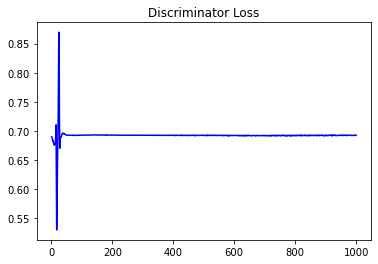

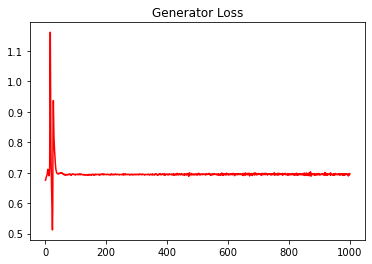

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1590536799175944


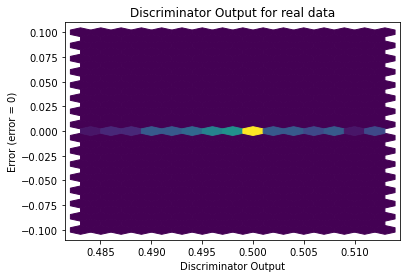

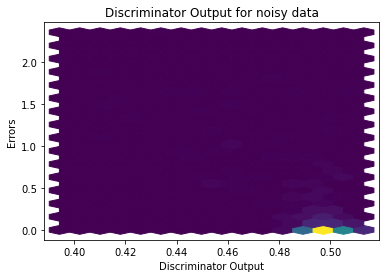

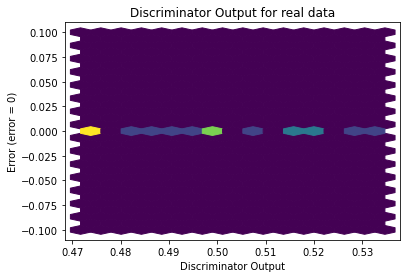

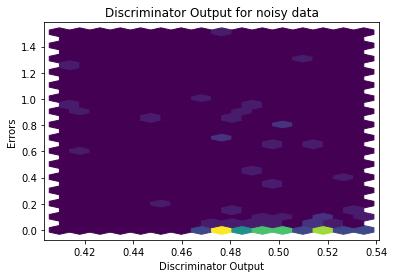

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


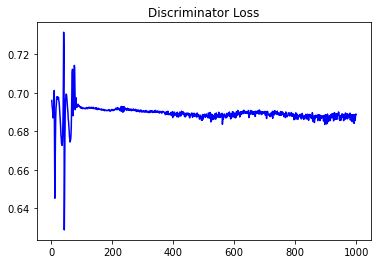

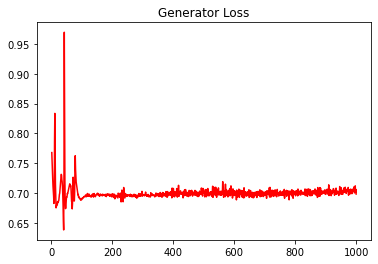

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.16720195814959102


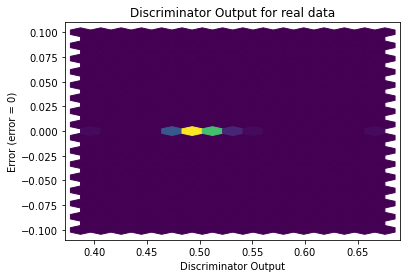

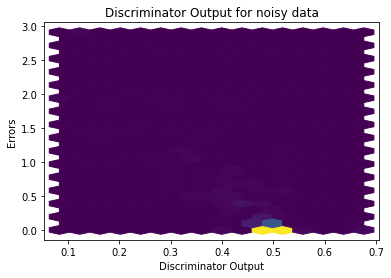

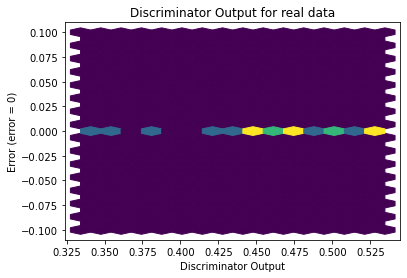

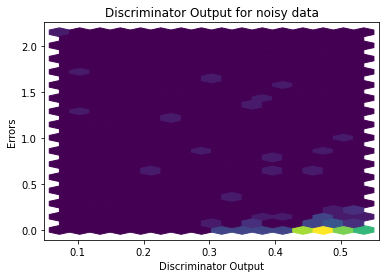

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6275]], requires_grad=True)
